<h2><center>Predicting Home Values in Los Angeles’ South Bay</center></h2>
<h3><center>Springboard | Capstone #1 - Data Story Code</center></h3>
<h4><center>By: Lauren Broussard</center></h4>

---

With our cleaned real estate data, let's see what early insights we can find in Los Angeles' South Bay housing market. 

We will asking the following questions: 

* What is the **average price of a home in this area**?  
* Is there a more popular **month of the year**, or **day of the week** for home sales?  
* Do newer homes tend to have **more bedrooms and/or bathrooms**? 

(For prior cleaning steps, refer to the notebook: "Capstone1_Data_Wrangling_Code.ipynb") 

In [1]:
# import modules
import pandas as pd
import numpy as np
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set() # set graphs to follow seaborn default view

In [3]:
# import cleaned dataframe
south_bay = pd.read_csv('south_bay_cleaned.csv', parse_dates=['SOLD DATE'])
south_bay['ZIP OR POSTAL CODE'] = south_bay['ZIP OR POSTAL CODE'].astype(str)

Let's first look at some basic information about our dataframe and home sales. 

For instance, there are **13,631 homes in our dataset, and 18 different columns (or features)**. 

In [4]:
south_bay.shape

(13631, 18)

We will also display the column names below, as well as display a quick view of some of the data.   

In [5]:
# display column names
south_bay.columns

Index(['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'PRICE',
       'ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'MLS#',
       'LATITUDE', 'LONGITUDE', 'NEIGHBORHOOD'],
      dtype='object')

In [6]:
# display first 10 rows of data
south_bay.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,PRICE,ZIP OR POSTAL CODE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,MLS#,LATITUDE,LONGITUDE,NEIGHBORHOOD
0,2018-03-29,Single Family Residential,15532 Patronella Ave,Gardena,710000,90249.0,3.0,2.00,1601.0,5381.0,1947,664.0,443.0,0.0,SB18038531,33.889368,-118.334071,Alondra Park
1,2019-08-22,Single Family Residential,3133 W 153Rd St,Gardena,615000,90249.0,3.0,2.50,1303.0,5900.0,1943,153.0,472.0,0.0,SB19162603,33.892470,-118.327727,Alondra Park
2,2018-09-11,Single Family Residential,15521 Chadron Ave,Gardena,710000,90249.0,3.0,1.75,1750.0,4994.0,1951,498.0,406.0,0.0,SB18170465,33.889390,-118.328180,Alondra Park
3,2019-08-29,Single Family Residential,15312 Ermanita Ave,Gardena,530000,90249.0,2.0,1.00,802.0,5855.0,1943,146.0,661.0,0.0,DW19165594,33.892295,-118.332291,Alondra Park
4,2019-09-11,Single Family Residential,3213 W 153Rd St,Gardena,815000,90249.0,4.0,2.00,2090.0,5900.0,1943,133.0,390.0,0.0,SB19184633,33.892401,-118.329460,Alondra Park


Lastly, let's look at some descriptive data about our dataframe to see things like mean/maximum, etc. 

In [7]:
# describe dataframe without scientific notation
south_bay.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000,13631.000000
mean,999798.639425,3.093243,2.287690,1736.641708,417671.822830,1968.980339,363.744479,556.168650,103.928912,33.852097,-118.342372
std,917935.943727,1.070531,0.975745,892.666193,16324475.351463,24.746528,208.941780,273.003295,171.107201,0.068687,0.049160
min,10000.000000,0.000000,0.500000,370.000000,4.000000,1887.000000,1.000000,13.000000,0.000000,33.708065,-118.453205
25%,539000.000000,2.000000,1.750000,1167.500000,5304.000000,1952.000000,180.000000,391.000000,0.000000,33.800090,-118.381918
50%,730000.000000,3.000000,2.000000,1531.000000,6704.000000,1965.000000,355.000000,507.000000,0.000000,33.851115,-118.344209
75%,1185000.000000,4.000000,2.750000,2046.000000,17958.000000,1986.000000,553.500000,650.000000,220.000000,33.898501,-118.305189
max,22650000.000000,22.000000,16.000000,18227.000000,1148807880.000000,2020.000000,730.000000,4757.000000,3083.000000,33.987955,-118.212023


One thing to note from the table above is that there looks to be a large spread in home prices, with the minimum price at 10,000 and the maximum price at over 22 million.

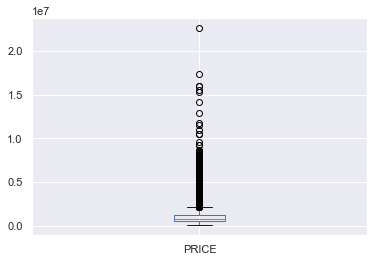

In [8]:
south_bay['PRICE'].plot(kind='box')

---

### What are prices of homes in this area?

We can look at home prices in a number of ways, but for now we'll look at prices in general, and then by property type and neighborhood.

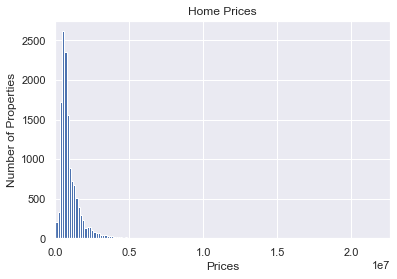

In [9]:
# plot histogram of home prices
plt.hist(south_bay['PRICE'], bins=150) 
plt.xlabel('Prices')
plt.ylabel('Number of Properties')
plt.title('Home Prices')
plt.xlim(0,22650000)
plt.show()     

The histogram above makes it hard to see, as a few of the very large data points make it difficult to see. Let's zoom in a bit. 

We can see in the zoomed in plot below that most homes are clustered between about 500,000 and 900,000

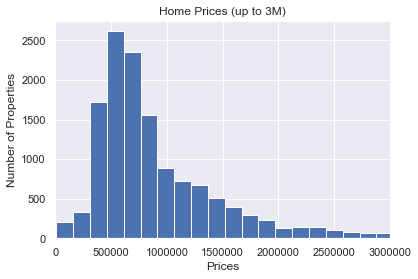

In [10]:
# plot histogram of home prices zoomed in to a max of 3 million dollars
plt.hist(south_bay['PRICE'], bins=150) 
plt.xlabel('Prices')
plt.ylabel('Number of Properties')
plt.title('Home Prices (up to 3M)')
plt.xlim(0,3000000)
plt.show()  

Next, we will look at properties by property type. To offset the large variations in price, we will look at the median price instead of mean.

Text(0, 0.5, 'Property Type')

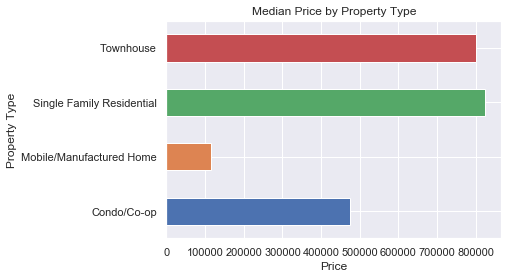

In [11]:
# plot median price, group by property type and price
south_bay.groupby('PROPERTY TYPE')['PRICE'].median().plot(kind='barh',color=['C0','C1','C2','C3'])
plt.title('Median Price by Property Type')
plt.xlabel('Price')
plt.ylabel('Property Type')

We can see above that the median price of a single family home appears to be close to the median price for a townhouse. We may explore this further in the future. 

Let's now look at prices by neighborhood.

Text(0, 0.5, 'PRICE')

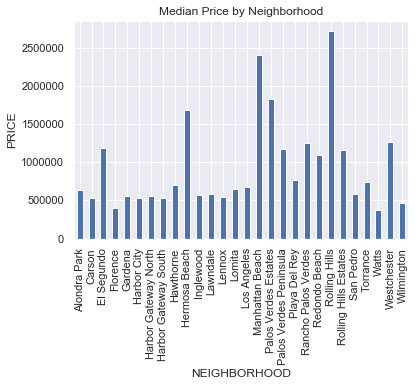

In [12]:
# plot median price by neighborhood
south_bay.groupby('NEIGHBORHOOD')['PRICE'].median().plot(kind = 'bar')
plt.title('Median Price by Neighborhood')
plt.ylabel('PRICE')

The neighborhoods with the highest median prices appear to be in Rolling Hills, Manhattan Beach, Palos Verdes Estates, and Hermosa Beach. 

---

### Is there a more popular day of the week, or month of the year for home sales? 

Let's first look at days of the week. 

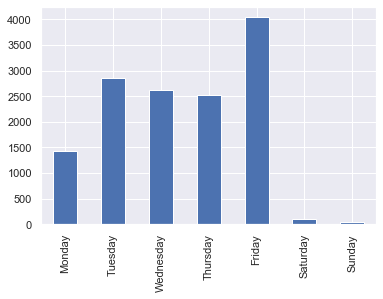

In [13]:
# create a categorical values for the days of the week 
dayofweek = pd.Categorical(south_bay['SOLD DATE'].dt.weekday_name,
               ordered=True,categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dayofweek.value_counts().plot(kind='bar')

Now, we will turn our attention to months of the year. 

Because our data goes from February 6, 2018 to January 24, 2020, let's split the data evenly to look at 2 comparable years.

In [14]:
# sort dataframe by date and split occurences in half
sb_sort = south_bay.sort_values(by=['SOLD DATE'],ascending=True)
year1 = sb_sort[:len(sb_sort)//2]
year2 = sb_sort[(len(sb_sort)//2):]

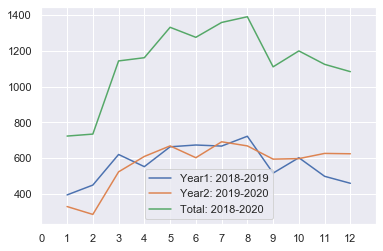

In [15]:
# plot each year's sales by month

year1['SOLD DATE'].dt.month.value_counts().sort_index().plot(kind='line')
year2['SOLD DATE'].dt.month.value_counts().sort_index().plot(kind='line')
south_bay['SOLD DATE'].dt.month.value_counts().sort_index().plot(kind='line')
plt.xlim(0,13) # x values start at 0 and end at 13, to see more of graph
plt.xticks(np.arange(0,13,1)) # display all months on x-axis
plt.legend(['Year1: 2018-2019','Year2: 2019-2020','Total: 2018-2020'])

In general, it appears that home sales were highest in July and August, and lowest in the months of January and February. This second observation could be attributed, however, to the timing with which we pulled our data. 

### Do newer homes tend to have more bedrooms and/or bathrooms? 

It would be interesting to see whether or not features like bedrooms or bathrooms are increasing with the year the home is built. 

Let's look at this for single family homes. 

In [16]:
# create dataframe of just single family homes
sb_sfh = south_bay[south_bay['PROPERTY TYPE'] == 'Single Family Residential']

In [17]:
#get median values by year of the number of bedrooms and bathrooms
beds = sb_sfh.groupby(sb_sfh['YEAR BUILT'])['BEDS'].median()
baths = sb_sfh.groupby(sb_sfh['YEAR BUILT'])['BATHS'].median()

Text(0.5, 1.0, 'Median Number of Bathroom by Year Built')

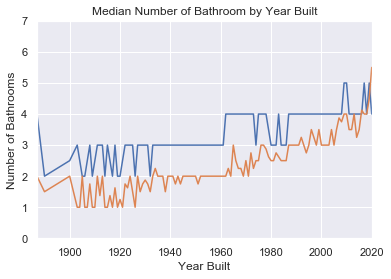

In [18]:
# plot number of bedrooms over time
beds.plot()
plt.ylim(0,7)
plt.ylabel('Number of Bedrooms')
plt.xlabel('Year Built')
plt.title('Median Number of Bedrooms by Year Built')

#plot number of bathrooms over time
baths.plot()
plt.ylim(0,7)
plt.ylabel('Number of Bathrooms')
plt.xlabel('Year Built')
plt.title('Median Number of Bathroom by Year Built')

The number of bedrooms and bathrooms both seem to be increasing over time, although it appears that the number of bathrooms has more of an upward trend (albeit a slight one).

### Other Insights

Finally, let's turn our attention to how all of the features relate to each other. We'll first make a correlations table to look at all of the features together to see if anything sticks out. 

Correlations Table

In [19]:
# get correlation coefficients
corr = south_bay.corr()

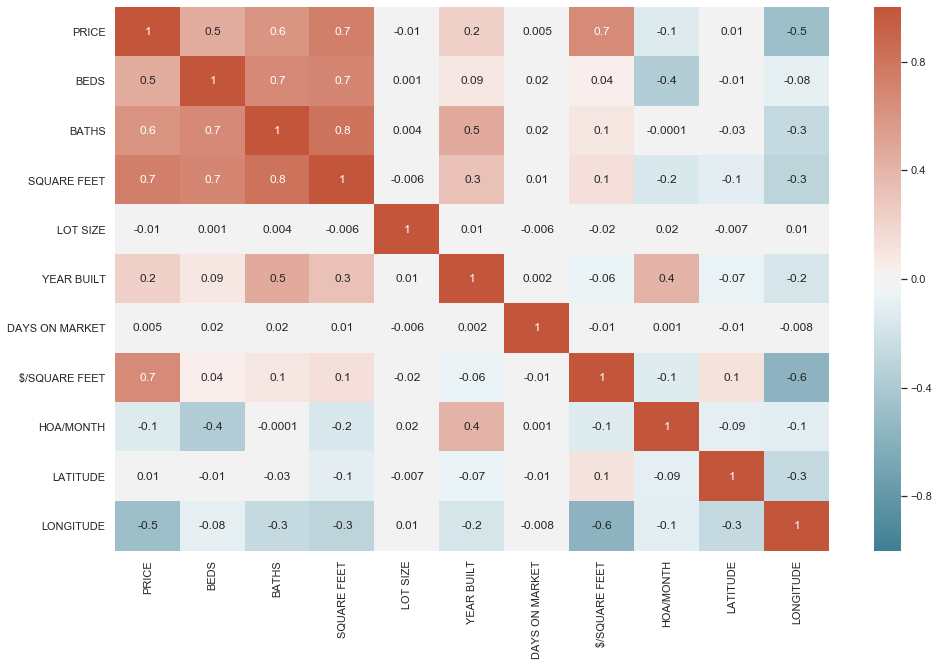

In [20]:
# plot correlations into a heatmap
plt.figure(figsize = (16,10))
sns.heatmap(corr,fmt = '.01g',annot=True,vmin=-1, vmax=1,cmap=sns.diverging_palette(220,20,as_cmap=True))

We would expect that features like price, bedrooms, bathrooms, and square feet of a home are all positively correlated.

Let's look at a scatter plot of a few of these features. 

Text(0.5, 1.0, 'Number of Bedrooms and Bathrooms')

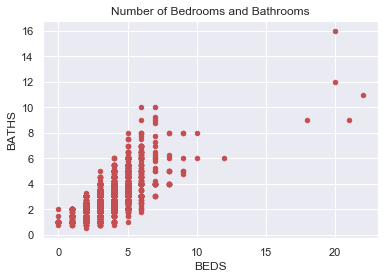

In [21]:
# make a scatter plot of bedrooms and bathrooms
south_bay.plot.scatter(x='BEDS',y='BATHS',c='r')
plt.title('Number of Bedrooms and Bathrooms')

As we would expect, the number of bedrooms seem to go up with the number of bathrooms in the property.

Text(0.5, 1.0, 'Price by Number of Bathrooms (SFR)')

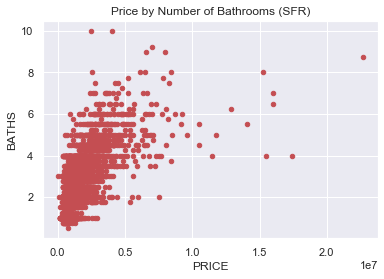

In [22]:
# make a scatter plot of price by number of bathrooms
south_bay[south_bay['PROPERTY TYPE'] == 'Single Family Residential'].plot.scatter(x='PRICE',y='BATHS',c='r')
plt.title('Price by Number of Bathrooms (SFR)')

The price of the property also seems to go up with the number of bathrooms. 

Future Discovery

The correlation matrix above also showed that there is a moderate negative correlation between longitude and price.  This would make sense, as the further a home is from the beach, the lower the price might be. In the future, it might be interesting to plot a heatmap of prices over a map of this area.